In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [3]:
dara = np.load("../datos/fit_exercise.npy")

In [4]:
dara

array([[ 0.59677897,  0.9210494 ,  1.15618395,  1.75451756,  1.8249173 ,
         2.26851454,  2.28263231,  2.50455365,  2.86139335,  2.93714046,
         3.12261223,  3.17285482,  3.22958914,  3.43178016,  3.61788656,
         3.92117518,  3.98044255,  4.14826212,  4.2310646 ,  4.2583029 ,
         4.26351307,  4.30862763,  4.33701173,  4.38572245,  4.80931901,
         4.83034264,  4.93685098,  5.01836676,  5.19485119,  5.31551374,
         5.31827587,  5.51314769,  6.11023511,  6.12894526,  6.23952952,
         6.30976124,  6.34400959,  6.84829739,  6.96469186,  7.1946897 ,
         7.22443383,  7.24455325,  7.29049707,  7.37995406,  8.49431794,
         8.66309158,  8.93389163,  9.44160018,  9.80764198,  9.85559786],
       [ 8.11257148,  3.52815075,  4.81023356,  0.89238164,  3.13295195,
         3.53338034,  1.89933975,  2.83896349,  0.89713921,  0.9500022 ,
         1.45700044,  1.05318568,  1.71011605,  0.06780647,  0.40019114,
         1.00444563, -0.02239716,  0.35714018,  0.

<ErrorbarContainer object of 3 artists>

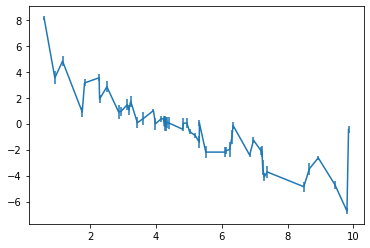

In [5]:
plt.errorbar(dara[0],dara[1],yerr=dara[2])

## Generating model

In [6]:
def chi(theta):
    suma = 0
    for index, element in enumerate(dara[0]):
        suma += (dara[1][index] - (theta[0]*dara[0][index] + theta[1]))**2 / dara[2][index]**2
    return suma

## Checking model

In [7]:
m = -1
b = 6
chi([m,b])

2154.651498070416

## Generating matrix of m's and b's

In [8]:
n = 10
m_range = np.linspace(0, -2, n)
b_range = np.linspace(2, 8, n)
chi_mesh = np.zeros((n,n))
mini = 100000000
for i,m in enumerate(m_range):
    for j, b in enumerate(b_range):
        chi_mesh[i][j] = chi([m, b])
        if chi_mesh[i][j] < mini:
            mini = chi_mesh[i][j]
            mini_m = m
            mini_b = b
print(mini)
print("m={:.4f} b={:.4f}".format(mini_m, mini_b))

1246.4692834694686
m=-1.1111 b=5.3333


[]

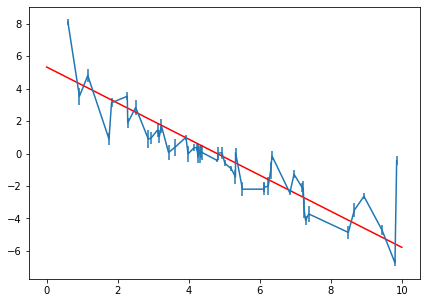

In [9]:
fig, ax = plt.subplots(figsize=(7, 5))
x = np.linspace(0,10,100)
ax.errorbar(dara[0],dara[1],yerr=dara[2])
ax.plot(x, mini_m * x + mini_b, color="Red")
ax.plot()

## Now, we try with random data

In [10]:
n_random = 10
m_range = [-2,0]
b_range = [2,8]

np.random.seed(5)
chiMeshRandom = np.zeros((n_random, n_random))

mRand = np.random.rand(n_random)
bRand = np.random.rand(n_random)

mRand = mRand*(m_range[1]-m_range[0]) + m_range[0]
bRand = bRand*(b_range[1]-b_range[0]) + b_range[0]

miniRandom = 100000000

for i in range(n_random):
    for j in range(n_random):
        chiMeshRandom[i][j] = chi([mRand[i], bRand[j]])
        print("{:.0f}".format(chiMeshRandom[i][j]), end=" ")
        if chiMeshRandom[i][j] < miniRandom:
            miniRandom = chiMeshRandom[i][j]
            miniRandomM = mRand[i]
            miniRandomB = bRand[i]
    print()

            
print(miniRandom)
print("m={:.4f} b={:.4f}".format(miniRandomM, miniRandomB))

22546 3304 9146 19079 2174 14500 9912 13711 4913 5838 
5343 24878 13201 6449 32090 8696 12371 9204 20021 18060 
23892 3737 9991 20317 2411 15578 10795 14758 5498 6491 
7168 29564 16595 8612 37392 11362 15647 11965 24231 22057 
6032 2714 1362 4443 5010 2667 1472 2410 1668 1408 
2846 6900 2218 2127 10782 1649 2025 1639 4625 3816 
2833 16102 7256 3201 21966 4345 6684 4643 12291 10796 
4997 3473 1310 3620 6154 2160 1347 1963 2128 1734 
16579 1809 5630 13640 1640 9848 6212 9208 2672 3264 
25626 4336 11103 21918 2765 16978 11954 16121 6286 7364 
1310.2063193586876
m=-0.9632 b=3.7765


In [28]:
n_random = 10000
m_range = [-2,0]
b_range = [2,8]

np.random.seed(5)
chiMeshRandom = np.zeros(shape=(n_random,3))
#print(chiMeshRandom)

mRand = np.random.rand(n_random)
bRand = np.random.rand(n_random)

mRand = mRand*(m_range[1]-m_range[0]) + m_range[0]
bRand = bRand*(b_range[1]-b_range[0]) + b_range[0]

chiMeshRandom[:,0] = mRand[:]
chiMeshRandom[:,1] = bRand[:]

miniRandom = 100000000

for i in range(n_random):
    chiMeshRandom[i][2] = chi([mRand[i], bRand[i]])
    if chiMeshRandom[i][2] < miniRandom:
        miniRandom = chiMeshRandom[i][2]
        miniRandomM = mRand[i]
        miniRandomB = bRand[i]

#print(mRand)
#print(bRand)
#print(chiMeshRandom)
            
print(miniRandom)
print("m={:.4f} b={:.4f}".format(miniRandomM, miniRandomB))

1231.9737067370531
m=-1.1035 b=5.4037


[]

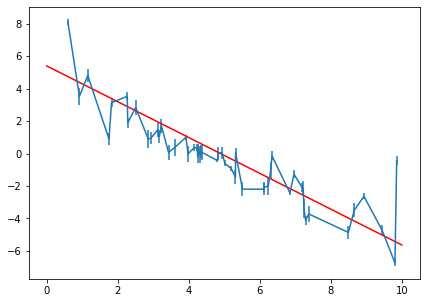

In [29]:
fig, ax = plt.subplots(figsize=(7, 5))
x = np.linspace(0,10,100)
ax.errorbar(dara[0],dara[1],yerr=dara[2])
ax.plot(x, miniRandomM * x + miniRandomB, color="Red")
ax.plot()

We create now the historgram

[]

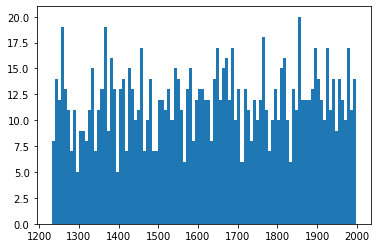

In [48]:
chiHist = [i[2] for i in chiMeshRandom if i[2] < 2000]
mHist = [i[0] for i in chiMeshRandom if i[2] < 2000]
bHist = [i[1] for i in chiMeshRandom if i[2] < 2000]
plt.hist(chiHist, 100)
plt.plot()

[]

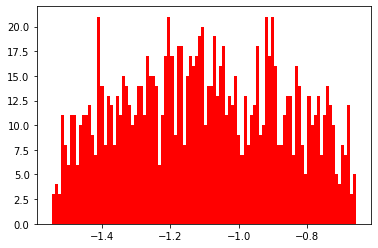

In [49]:
plt.hist(mHist, 100, color="red")
#plt.hist(bHist, 100, color="orange")
plt.plot()

[]

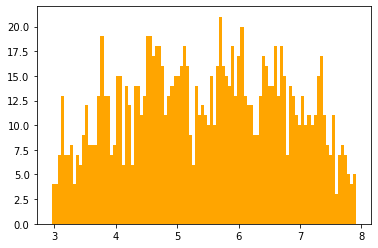

In [51]:
plt.hist(bHist, 100, color="Orange")
plt.plot()

[]

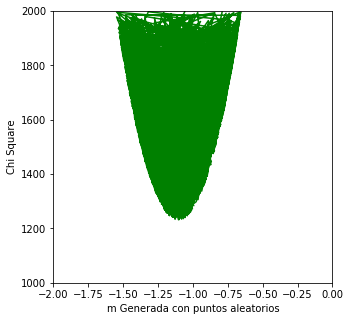

In [74]:
fig, ax = plt.subplots(figsize=(5,5))
plt.xlim(-2, 0)
plt.ylim(1000, 2000)
#print(mHist)
#print("-----------")
#print(chiHist)
ax.plot(mHist, chiHist, y, color="Green")
ax.set_xlabel('m Generada con puntos aleatorios')
ax.set_ylabel('Chi Square')
plt.plot()

[]

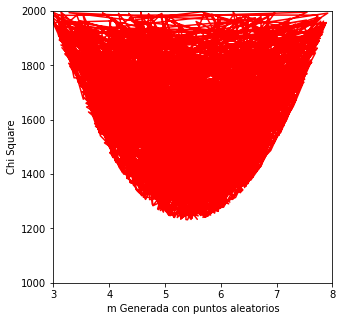

In [76]:
fig, ax = plt.subplots(figsize=(5,5))
plt.xlim(3, 8)
plt.ylim(1000, 2000)
#print(mHist)
#print("-----------")
#print(chiHist)
ax.plot(bHist, chiHist, y, color="Red")
ax.set_xlabel('m Generada con puntos aleatorios')
ax.set_ylabel('Chi Square')
plt.plot()

## Now, we going to try optimize

In [77]:
optimization = minimize(chi, [-1,6])
mOptima = optimization.x[0]
bOptima = optimization.x[1]
print(mOptima)
print(bOptima)

-1.1040757137521313
5.440555302514018


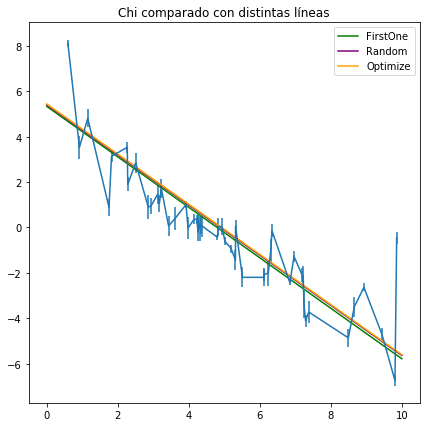

In [78]:
fig, ax = plt.subplots(figsize=(7, 7))
x = np.linspace(0,10,100)
ax.errorbar(dara[0],dara[1],yerr=dara[2])
ax.plot(x, mini_m * x + mini_b, color="Green", label="FirstOne")
ax.plot(x, miniRandomM * x + miniRandomB, color="purple", label="Random")
ax.plot(x, mOptima * x + bOptima, color="Orange", label="Optimize")
ax.legend()
plt.title("Chi comparado con distintas líneas")
plt.plot()
d=1